In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
data = pd.read_csv('/content/ADANIPORTS.csv')

In [ ]:
prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [ ]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(train_data[:-1], train_data[1:], epochs=10, batch_size=1)

Epoch 1/10
2656/2656 [==============================] - 20s 5ms/step - loss: 0.0021
Epoch 2/10
2656/2656 [==============================] - 8s 3ms/step - loss: 4.0299e-04
Epoch 3/10
2656/2656 [==============================] - 7s 3ms/step - loss: 3.5055e-04
Epoch 4/10
2656/2656 [==============================] - 9s 3ms/step - loss: 3.4227e-04
Epoch 5/10
2656/2656 [==============================] - 7s 3ms/step - loss: 3.3566e-04
Epoch 6/10
2656/2656 [==============================] - 8s 3ms/step - loss: 3.5643e-04
Epoch 7/10
2656/2656 [==============================] - 8s 3ms/step - loss: 3.6033e-04
Epoch 8/10
2656/2656 [==============================] - 7s 3ms/step - loss: 3.4663e-04
Epoch 9/10
2656/2656 [==============================] - 8s 3ms/step - loss: 3.2338e-04
Epoch 10/10
2656/2656 [==============================] - 7s 3ms/step - loss: 3.8286e-04


In [ ]:
train_predictions = model.predict(train_data[:-1])
test_predictions = model.predict(test_data[:-1])

21/21 [==============================] - 1s 2ms/step


In [ ]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

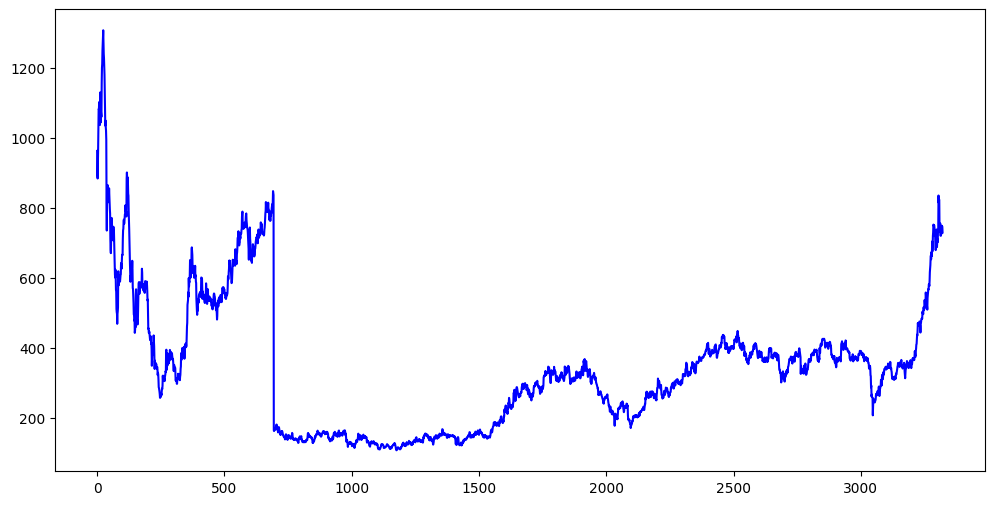

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(prices, color='blue', label='Actual Prices')

In [ ]:
test_range = range(len(train_predictions) + 1, len(prices) + 1)
test_predictions_reshaped = test_predictions.reshape(-1)

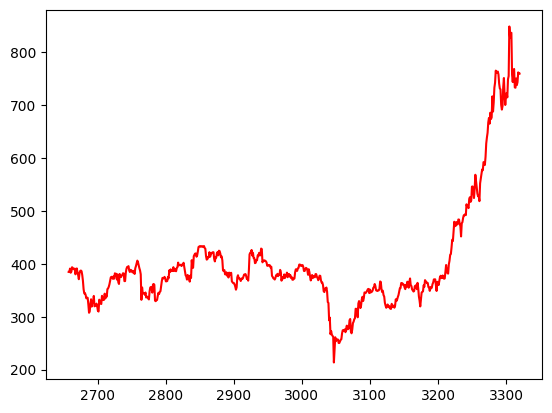

In [ ]:
test_range = test_range[:len(test_predictions_reshaped)]
plt.plot(test_range, test_predictions_reshaped, color='red', label='Test Predictions')

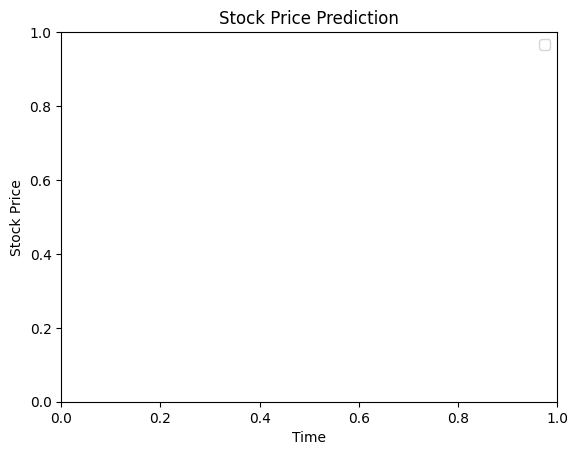

In [ ]:
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(prices[train_size+1:], test_predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 154.10198437487142


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 12.413782033484857


In [ ]:
mae = mean_absolute_error(prices[train_size+1:], test_predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 9.110850635206843
